In [ ]:
import cv2
import numpy as np
from sklearn.cluster import KMeans

def color_recognition(image_path, num_colors):
    # Read the image
    image = cv2.imread(image_path)

    # Convert the image from BGR to RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Reshape the image to a 2D array of pixels
    pixels = image_rgb.reshape(-1, 3)

    # Perform K-means clustering to extract dominant colors
    kmeans = KMeans(n_clusters=num_colors)
    kmeans.fit(pixels)

    # Get the RGB values of the dominant colors
    colors_rgb = kmeans.cluster_centers_.astype(int)

    # Convert RGB values to hexadecimal color codes
    colors_hex = ['#' + ''.join(format(c, '02x') for c in color) for color in colors_rgb]

    return colors_hex

# Example usage
image_path = '/content/capyburn.JPG'  # Replace with the actual path to your image
num_colors = 5  # Number of dominant colors to extract
colors = color_recognition(image_path, num_colors)
print("Dominant colors:", colors)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Dominant colors: ['#73765d', '#9f9072', '#5e2922', '#97504b', '#c2a88d']


In [ ]:
import webcolors

def hex_to_rgb(hex_value):
    hex_value = hex_value.lstrip('#')
    return tuple(int(hex_value[i:i+2], 16) for i in (0, 2, 4))

def rgb_to_color_name(rgb_tuple):
    min_distance = float('inf')
    closest_color = None

    for color_name, hex_value in webcolors.CSS3_NAMES_TO_HEX.items():
        color_rgb = hex_to_rgb(hex_value)

        distance = sum((x - y) ** 2 for x, y in zip(rgb_tuple, color_rgb))

        if distance < min_distance:
            min_distance = distance
            closest_color = color_name

    return closest_color

# Example usage
rgb_value = (193, 247, 251)  # Replace with your RGB value
color_name = rgb_to_color_name(rgb_value)
print("Color name:", color_name)

Color name: paleturquoise


Color: black - Percentage: 58.76%
Color: red - Percentage: 28.83%
Color: red-violet - Percentage: 8.26%
Color: orange - Percentage: 2.23%
Color: yellow-orange - Percentage: 1.39%


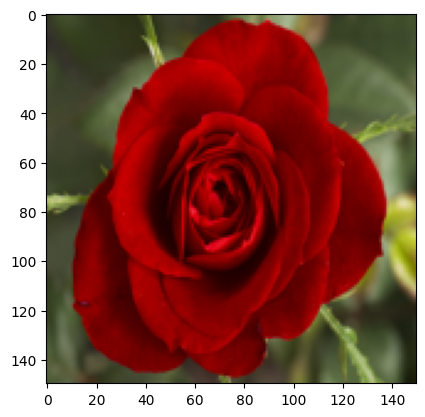

In [ ]:
from PIL import Image
import numpy as np
from collections import Counter
import cv2
import matplotlib.pyplot as plt

# Define the RGB values for the colors
color_dataset = {
    'red': [255, 0, 0],
    'yellow': [255, 255, 0],
    'green': [0, 255, 0],
    'blue': [0, 0, 255],
    'violet': [127, 0, 255],
    'orange': [255, 165, 0],
    'red-orange': [255, 69, 0],
    'yellow-orange': [255, 140, 0],
    'blue-green': [0, 255, 127],
    'blue-violet': [138, 43, 226],
    'red-violet': [199, 21, 133],
    'black': [0, 0, 0],
    'white': [255, 255, 255],
    # 'brown': [139, 69, 19],
    # 'gray': [128, 128, 128]
}

# Function to calculate Euclidean distance between two colors
def euclidean_distance(color1, color2):
    return np.sqrt(np.sum((color1 - color2) ** 2))

# Function to recognize the closest color to a given RGB value
def recognize_color(rgb_value):
    distances = {}
    for color_name, color_value in color_dataset.items():
        distance = euclidean_distance(rgb_value, np.array(color_value))
        distances[color_name] = distance
    closest_color = min(distances, key=distances.get)
    return closest_color

# Load and preprocess the image
image = Image.open('/content/rose.jpg')

# Convert the image to RGB mode
preprocessed_image = image.resize((150,150))
preprocessed_image = preprocessed_image.convert('RGB')


# Get the width and height of the image
width, height = preprocessed_image.size

# Process each pixel in the image and store recognized colors
recognized_colors = []
for y in range(height):
    for x in range(width):
        # Get the RGB values of the current pixel
        pixel_rgb = preprocessed_image.getpixel((x, y))

        # Recognize the color of the pixel
        recognized_color = recognize_color(pixel_rgb)

        # Add the recognized color to the list
        recognized_colors.append(recognized_color)

# Count the occurrences of each recognized color
color_counter = Counter(recognized_colors)

total_count = sum(color_counter.values())

# Get the top three most common colors
top_three_colors = color_counter.most_common(5)

plt.imshow(preprocessed_image)
# Print the top three colors
for color, count in top_three_colors:
    percentage = (count / total_count) * 100
    print(f"Color: {color} - Percentage: {percentage:.2f}%")

In [ ]:
import cv2
import numpy as np
import skimage.measure
color = [
    [#000
        [#000
          "",#000
          "",#001
          "",#002
          "",#003
          "",#004
        ],
        [#010
          "",#010
          "",#011
          "",#012
          "",#013
          "",#014
        ],
        [#020
          "",#020
          "",#021
          "",#022
          "",#023
          "",#024
        ],
        [#030
          "",#030
          "",#031
          "",#032
          "",#033
          "",#034
        ],
        [#040
          "",#040
          "",#041
          "",#042
          "",#043
          "",#044
        ],
    ],
]

img = cv2.imread('/content/rose.jpg')

img = cv2.Color(img, cv2.COLOR_BGR2RGB)

img = img // 51.2

shape = (5, 5)

skimage.measure.block_reduce(img, shape, np.mean)

img_color = []

for i in range(0, 5):
  for j in range(0, 5):
    img_color.append(color[img[i, j][0], img[i, j][1], img[i, j][2]])

# Count the occurrences of each recognized color
color_counter = Counter(img_color)

total_count = sum(color_counter.values())

# Get the top three most common colors
top_three_colors = color_counter.most_common(5)

plt.imshow(preprocessed_image)
# Print the top three colors
for color, count in top_three_colors:
    percentage = (count / total_count) * 100
    print(f"Color: {color} - Percentage: {percentage:.2f}%")